In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# %matplotlib inline

In [9]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [10]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [206]:
# group by director and aggregate income & number of movies
directors = data.groupby('director_name')
directors_sum = directors.aggregate(['sum','count'])['gross']

#rename
directors_sum.rename(columns = {'sum':'gross income','count':'movies'}, inplace = True)

#sort (index 0 is a director named '0')
top10 = directors_sum.sort_values(['movies'], ascending=False).iloc[1:11]
top10

,gross income,movies
director_name,,
Steven Spielberg,4.114233e+09,26
Woody Allen,3.083454e+08,22
Clint Eastwood,1.378321e+09,20
Martin Scorsese,9.202871e+08,20
Ridley Scott,1.337772e+09,17
Steven Soderbergh,1.050730e+09,16
Spike Lee,3.285004e+08,16
Tim Burton,2.071275e+09,16
Renny Harlin,5.239759e+08,15


C:\Users\allen\AppData\Local\Temp\ipykernel_34544\859881321.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10.head(10).index.tolist())
C:\Users\allen\AppData\Local\Temp\ipykernel_34544\859881321.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0,1e+09,2e+09,3e+09,4e+09])


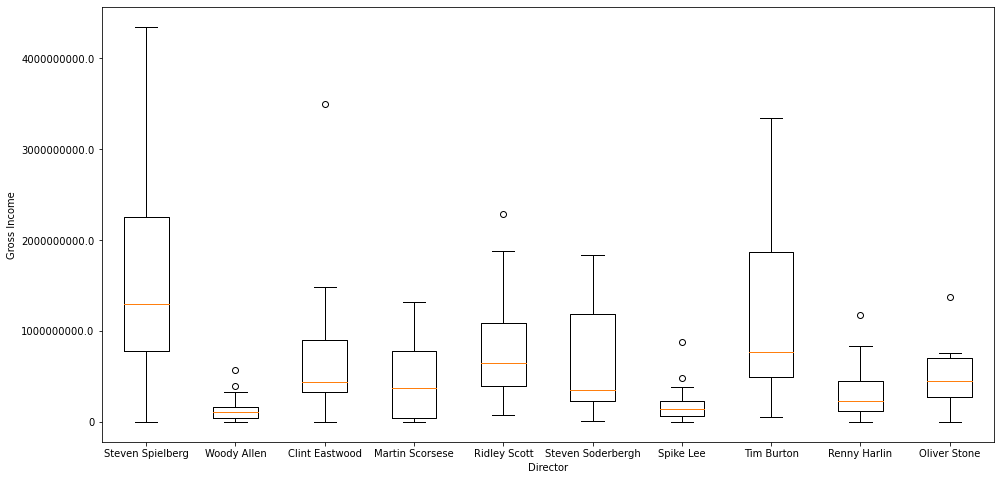

In [207]:
top = []

#for each director in top-10, append their gross income 
for name in top10.head(10).index:
    top.append(data[data['director_name']==name]['gross'])

#set size
fig,ax= plt.subplots(figsize =(16, 8))

#rename x-axis & y-axis
ax.set_xlabel('Director')
ax.set_ylabel('Gross Income')
ax.set_xticklabels(top10.head(10).index.tolist())
ax.set_yticklabels([0,0,1e+09,2e+09,3e+09,4e+09])

plt.boxplot(top)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

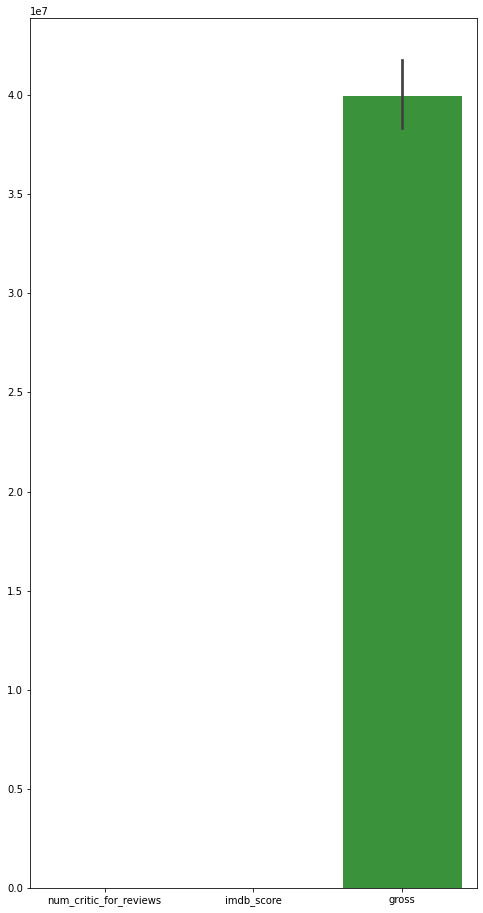

In [240]:
var = data[['num_critic_for_reviews','imdb_score','gross']]

plt.figure(figsize=(8,16))
#plt.boxplot(var)
sns.barplot(data=var)
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [243]:
data['sales'] = data['gross'] - data['budget']
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [255]:
#reassign directors for updated column
directors = data.groupby('director_name')
directors_sales = directors.aggregate(['sum'])['sales']

#rename
directors_sales.rename(columns = {'sum':'total sales'}, inplace = True)

#sort
top = directors_sales.sort_values(['total sales'], ascending=False)
top.iloc[0:1]

,total sales
director_name,
Steven Spielberg,2.451332e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

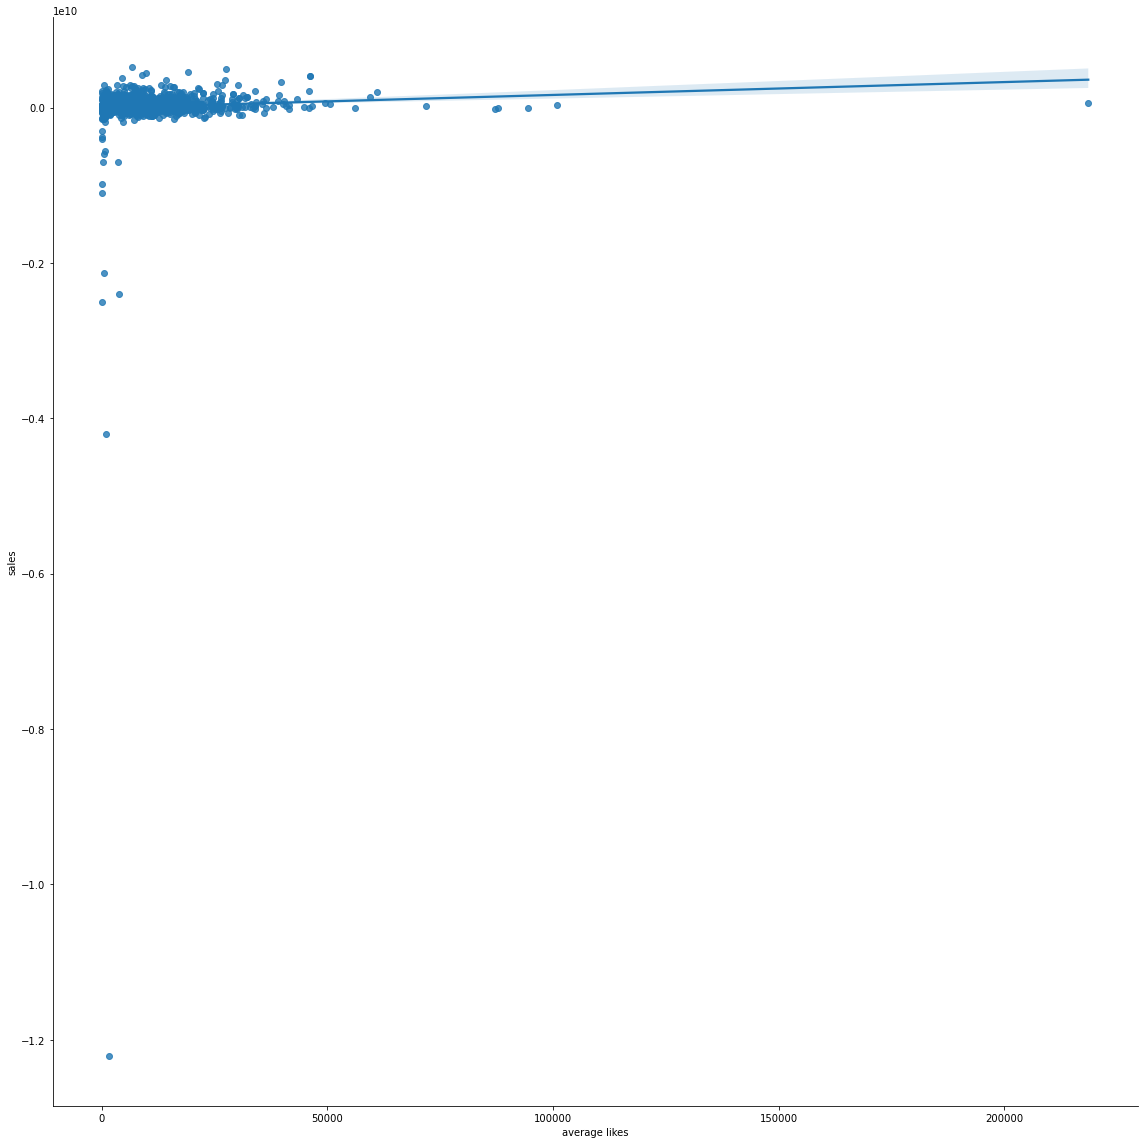

In [274]:
#get average
data['average likes'] = data[['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'actor_2_facebook_likes', 'movie_facebook_likes']].mean(axis=1)

sns.lmplot(x="average likes", y="sales", data=data, height=16)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

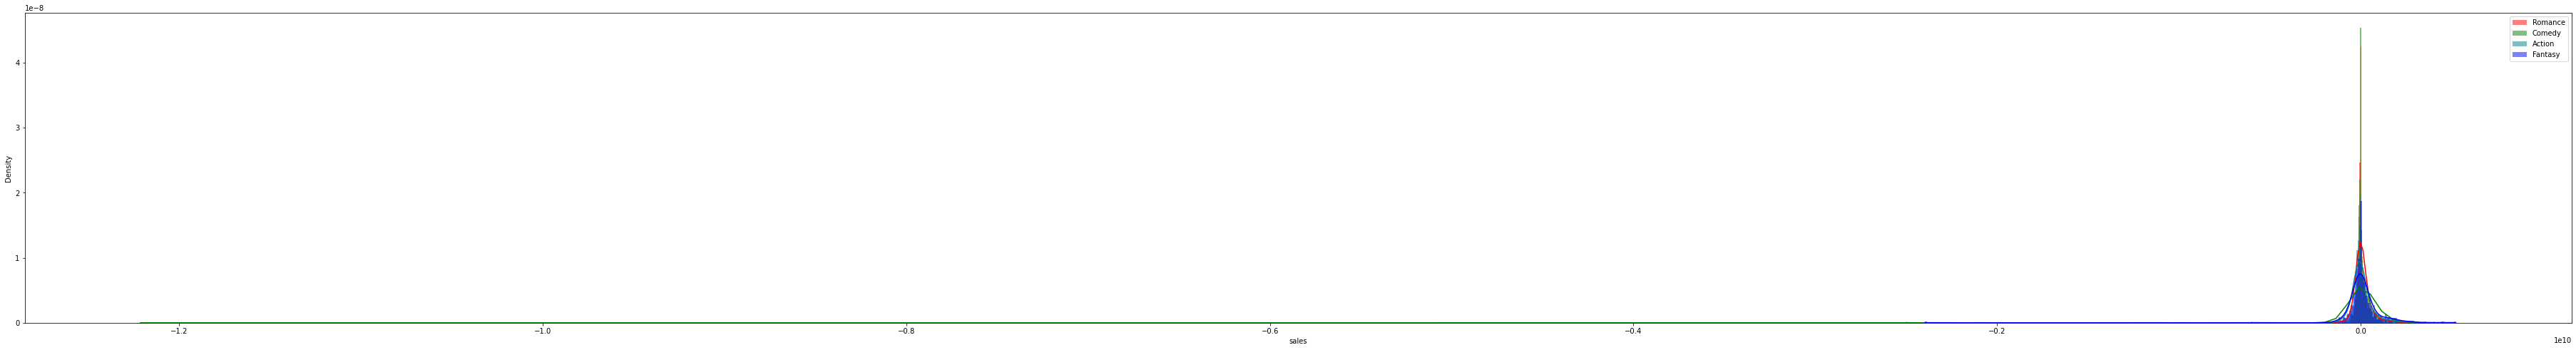

In [273]:
#find relevant rows
romance = data[data['genres'].str.contains('Romance')]
comedy = data[data['genres'].str.contains('Comedy')]
action = data[data['genres'].str.contains('Action')]
fantasy = data[data['genres'].str.contains('Fantasy')]

#set size
fig,ax= plt.subplots(figsize =(64, 8))

#set histogram
ax = sns.histplot(romance["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(comedy["sales"], color="green", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(action["sales"], color="teal", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(fantasy["sales"], color="blue", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [275]:
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,69.500000,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,5917.666667,5917.666667,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,2.666667,2.666667,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,866.666667,866.666667,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,126.666667,126.666667,41.666667


## Copying the whole dataframe

In [276]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [278]:
df.dtypes

Unnamed: 0                     int64
movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
a

In [281]:
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average likes,average_actor_likes,nm_unnamed,nm_num_critic_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,6770.833333,930.333333,0.000000,0.889299
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15818.833333,15333.333333,0.000198,0.371464
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,18042.333333,3851.333333,0.000397,0.740467
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,60959.833333,24333.333333,0.000595,1.000000
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,12.0,7.1,0.00,0.0,0.0,69.500000,69.500000,47.666667,0.000793,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,593.0,7.5,16.00,32000.0,0.0,5917.666667,5917.666667,584.333333,0.999207,0.052891
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.0,6.3,0.00,16.0,-1400.0,2.666667,2.666667,0.000000,0.999405,0.015990
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,719.0,6.3,2.35,660.0,10443.0,866.666667,866.666667,718.000000,0.999603,0.017220
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,23.0,6.6,1.85,456.0,84122.0,126.666667,126.666667,41.666667,0.999802,0.052891


In [283]:
#reran it here to avoid doubling 'nm_num_critic_for_reviews' (although... some here might've ended up being doubled when this was accidentally ran while typing -unfinished-)
# 'nm_duration' might've been doubled
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)

# 'nm_director_facebook_likes' might've been doubled
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)

max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)

max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)

# 'actor_3_facebook_likes' might've been doubled
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)

max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (df['gross'] - min) / (max-min)

max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)

max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)

max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)

max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)

max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)

max = df['title_year'].max()
min = df['title_year'].min()
df['nm_title_year'] = (df['title_year'] - min) / (max-min)

max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)

max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)

max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)

max = df['sales'].max()
min = df['sales'].min()
df['nm_sales'] = (df['sales'] - min) / (max-min)

max = df['average_likes'].max()
min = df['average_likes'].min()
df['nm_average_likes'] = (df['average_likes'] - min) / (max-min)

max = df['average_actor_likes'].max()
min = df['average_actor_likes'].min()
df['nm_average_actor_likes'] = (df['average_actor_likes'] - min) / (max-min)
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales,nm_average_likes,nm_average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.000000,0.603557,1.940158e-02,0.996528,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.000000,0.244664,2.455896e-02,0.995536,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,0.023256,0.196443,2.005649e-02,0.999504,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,0.000000,0.533794,2.046580e-02,0.998016,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.023256,0.070949,0.000000e+00,0.000000,0.789474,1.000000,0.091691,0.958898,0.027062,0.002676
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,0.000000,0.000593,1.146085e-07,0.998512,0.663158,0.000000,0.000046,0.958898,0.000012,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.116279,0.001779,0.000000e+00,0.998016,0.663158,0.146875,0.001891,0.958899,0.003963,0.003289
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,0.000000,0.016601,9.004953e-08,0.994048,0.694737,0.115625,0.001307,0.958905,0.000579,0.000191
